In [4]:
# Connecting the necessary libraries
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
# Load dataset. Take the first two features
diabetes = datasets.load_diabetes ()
diabetes_X = diabetes.data[:, np.newaxis , 2]

In [87]:
# Create train and test split
X_train = diabetes_X [: -40];
X_test = diabetes_X [-40:]
y_train = diabetes.target [: -40];
y_test = diabetes.target [-40:]

Проверим данные на линейность

<Axes: >

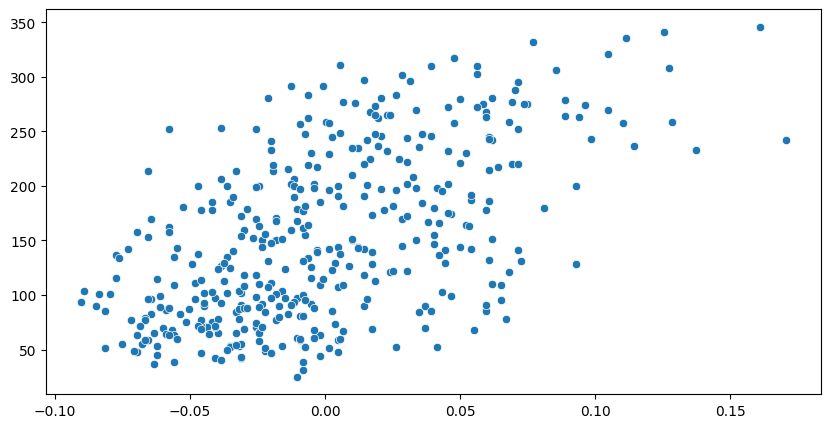

In [88]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=X_train.reshape(-1), y=y_train.reshape(-1))

In [89]:
# Fit the model
model = LinearRegression ()
model.fit(X_train , y_train)
y_pred = model.predict(X_test)

Построим график получившейся модели

<Axes: >

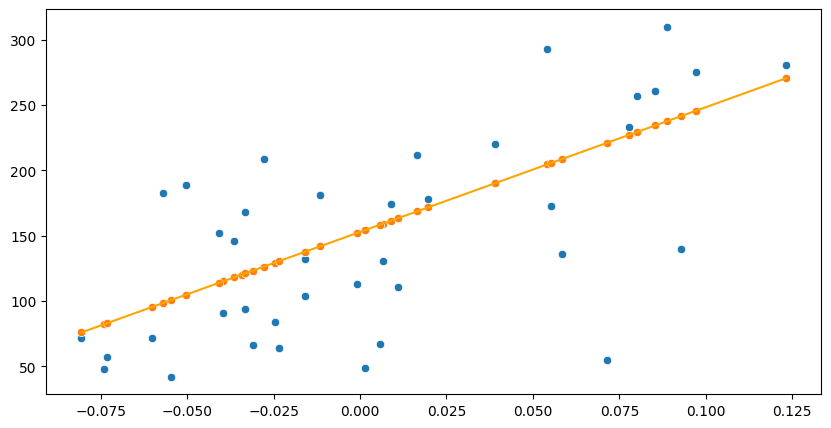

In [90]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=X_test.reshape(-1), y=y_test.reshape(-1))
sns.scatterplot(x=X_test.reshape(-1), y=y_pred.reshape(-1))
sns.lineplot(x=X_test.reshape(-1), y=y_pred.reshape(-1), c="orange")

Посмотрим на гистограмму ошибок

<Axes: ylabel='Density'>

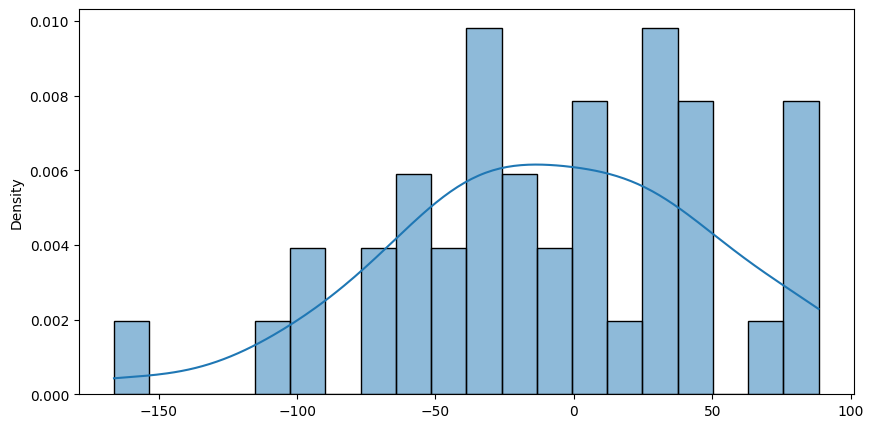

In [91]:
plt.figure(figsize=(10, 5))
sns.histplot(x=y_test.reshape(-1) - y_pred.reshape(-1), bins=20, kde=True, stat="density")

Если показать это слепому человеку, то он в принципе скажит, что это нормальное распределение

Проверим ошибки на нормальное распределение.
Используем критерии Шапиро–Уилка, Жарка - Бера и
Д’Агостино–Пирсона.

In [92]:
import numpy as np
from scipy.stats import shapiro, jarque_bera, normaltest
stat_shapiro, p_value_shapiro = shapiro(y_test.reshape(-1) - y_pred.reshape(-1))
print(f"Shapiro-Wilk Test:\nStatistics={stat_shapiro}, p-value={p_value_shapiro}")
if p_value_shapiro > 0.05:
    print("Распределение похоже на нормальное\n")
else:
    print("Распределение не является нормальным\n")

# Критерий Жарка-Бера
stat_jarque_bera, p_value_jarque_bera = jarque_bera(y_test.reshape(-1) - y_pred.reshape(-1))
print(f"Jarque-Bera Test:\nStatistics={stat_jarque_bera}, p-value={p_value_jarque_bera}")
if p_value_jarque_bera > 0.05:
    print("Распределение похоже на нормальное\n")
else:
    print("Распределение не является нормальным\n")

# Критерий Д'Агостино–Пирсона
stat_dagostino, p_value_dagostino = normaltest(y_test.reshape(-1) - y_pred.reshape(-1))
print(f"D'Agostino and Pearson Test:\nStatistics={stat_dagostino}, p-value={p_value_dagostino}")
if p_value_dagostino > 0.05:
    print("Распределение похоже на нормальное")
else:
    print("Распределение не является нормальным")

Shapiro-Wilk Test:
Statistics=0.9748820662498474, p-value=0.5060192942619324
Распределение похоже на нормальное

Jarque-Bera Test:
Statistics=0.7979956037074116, p-value=0.6709921762907907
Распределение похоже на нормальное

D'Agostino and Pearson Test:
Statistics=1.2158463715021048, p-value=0.5444804804920997
Распределение похоже на нормальное


Проверим наши остатки на
гомоскедастичность.


<Axes: >

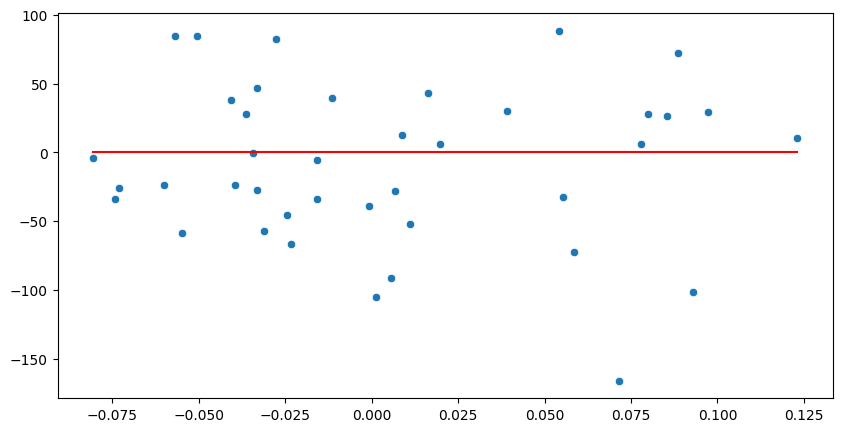

In [99]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=X_test.reshape(-1), y=y_test.reshape(-1) - y_pred.reshape(-1))
sns.lineplot(x=X_test.reshape(-1), y=0, c = "red")

В целом, удолетворительный результат. Подытожив, можно сказать, что наша модель соответствует линейной регрессии